In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
exp = pd.read_excel('neon_eta_negp_gauss3.xlsx', sheet_name='eta')
exp['photon'] = exp['photon (eV)']
exp['weight'] = 1 / exp['eta_f−d_err'] ** 2
exp['weighted_dph'] = exp['weight'] * exp['eta_f−d']

grp = exp[['photon', 'weighted_dph', 'weight']].groupby('photon').sum()
grp['ke'] = 2*grp.index - 24.58738880
grp['dph'] = grp['weighted_dph'] / grp['weight']
grp['dph_err'] = 1 / grp['weight'] ** 0.5
grp = grp[['ke', 'dph', 'dph_err']]
grp

,ke,dph,dph_err
photon,,,
14.3,4.012611,1.667223,0.027393
15.9,7.212611,1.452253,0.043198
19.1,13.612611,1.402048,0.014170


In [3]:
def err_operadd(a, b):
    return (a**2 + b**2) ** 0.5


dff = pd.DataFrame({
    'ke': (grp['ke'].values[1:] + grp['ke'].values[:-1]) / 2,
    'ke_err': np.diff(grp['ke']) / 2,
    'dt': np.diff(grp['dph']) / np.diff(grp['ke']) * 24.1888432651 / 0.0367493,
    'dt_err': (err_operadd(grp['dph_err'].values[1:], grp['dph_err'].values[:-1])
               / np.diff(grp['ke']) * 24.1888432651 / 0.0367493),
})
dff

,ke,ke_err,dt,dt_err
0,5.612611,1.6,-44.217493,10.521446
1,10.412611,3.2,-5.163374,4.675657


In [4]:
the = pd.read_excel('theory_elena.xlsx')
the['dph'] = (the['phase_diff (rad)']-np.pi) % (2*np.pi)
the['ke'] = 2*the['w_photon (eV)'] - 24.58738880
the['dt'] = np.gradient(the['dph'], the['ke']) * 24.1888432651 / 0.0367493
the = the[['ke', 'dph', 'dt']][the['ke']<14]
the

,ke,dph,dt
0,4.412611,1.430073,-81.355015
1,5.412611,1.306473,-67.260462
2,6.412611,1.225699,-46.453836
3,7.412611,1.165321,-35.943489
4,8.412611,1.116484,-29.936162
5,9.412611,1.074359,-26.001589
6,10.412611,1.037477,-22.886357
7,11.412611,1.004818,-20.309137
8,12.412611,0.975767,-18.137357
9,13.412611,0.949707,-16.179179


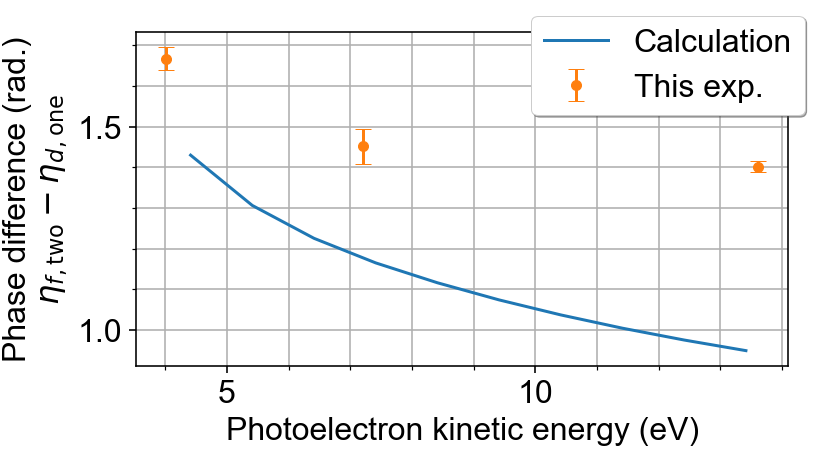

In [5]:
plt.style.use('My Presentation.mplstyle')
plt.figure(figsize=(11.9,6.8))
plt.xlabel(r'Photoelectron kinetic energy (eV)')
plt.ylabel('Phase difference (rad.)\n' r'${\eta_f}_{\rm,two} - {\eta_d}_{\rm,one}$')

plt.plot(the['ke'], the['dph'], label='Calculation')
plt.errorbar(grp['ke'], grp['dph'],
             yerr=grp['dph_err'],
             fmt='o',
             label='This exp.')

plt.locator_params(axis='x', steps=[1, 5, 10])
plt.locator_params(axis='y', steps=[1, 5, 10])
plt.grid(True, which='both')

plt.figlegend(loc='upper right', shadow=True)
plt.tight_layout()
plt.savefig('fig_compare_dph_slide.pdf')
plt.show()

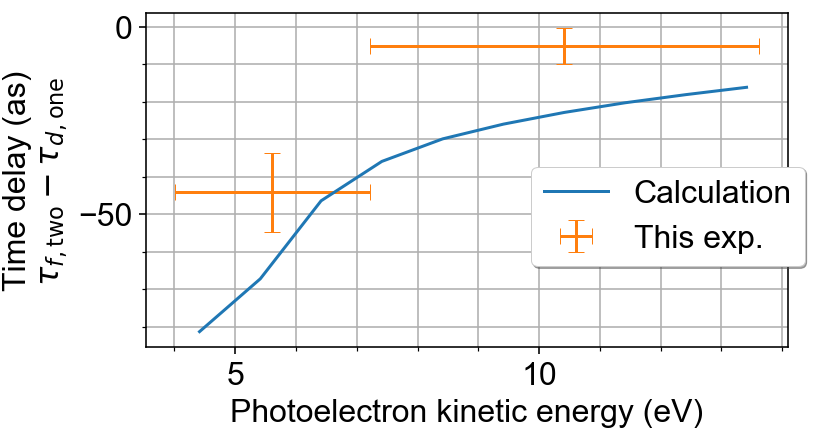

In [6]:
plt.style.use('My Presentation.mplstyle')
plt.figure(figsize=(11.9,6.8))
plt.xlabel(r'Photoelectron kinetic energy (eV)')
plt.ylabel('Time delay (as)\n' r'${\tau_f}_{\rm,two} - {\tau_d}_{\rm,one}$')

plt.plot(the['ke'], the['dt'], label='Calculation')
plt.errorbar(dff['ke'], dff['dt'],
             xerr=dff['ke_err'], yerr=dff['dt_err'],
             fmt=',',
             label='This exp.')

plt.locator_params(axis='x', steps=[1, 5, 10])
plt.locator_params(axis='y', steps=[1, 5, 10])
plt.grid(True, which='both')

plt.figlegend(loc='center right', shadow=True)
plt.tight_layout()
plt.savefig('fig_compare_dt_slide.pdf')
plt.show()